In [1]:
import pandas as pd
import os

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In this notebook, we want to find how the best features affect the median rental payment of each area.

In [2]:
abs_2021 = pd.read_csv('../data/curated/2021ABS_csv')

In [3]:
#The list of features we've previuously taken from the abs data
features = [
    'Estimated resident population (no.)',
    'Population density (persons/km2)',
    'Median age - persons (years)',
    'Working age population (aged 15-64 years) (no.)', 'Renter (no.)',
    'Health care and social assistance (no.)','Financial and insurance services (no.)',
    'Administrative and support services (no.)','Education and training (no.)',
    'Accommodation and food services (no.)','Public administration and safety (no.)',
    'Value of residential building ($m)', 'Houses - total (no.)', 
    'Townhouses - total (no.)', 'Apartments - total (no.)', 'Rented (no.)',
    'Count of homeless persons (no.)','Used at least one form of public transport (train, tram, bus, ferry) (no.)',
    'Median weekly household rental payment ($)', 'Median equivalised total household income (weekly) ($)'
]



In [4]:
#Construct the dataframes to analyse this data
abs_features = abs_2021[features]
abs_features = abs_features.dropna(axis=0).reset_index(drop=True)
rent = abs_features['Median weekly household rental payment ($)']
abs_features = abs_features.drop(['Median weekly household rental payment ($)'], axis=1)

In [5]:
#We want to find the best subgrouop of all the features, so we find the highest score possible with our given features
for i in range(1, 20):    
    test = SelectKBest(score_func=f_classif, k=i)
    fit = test.fit(abs_features, rent)

    # Summarize scores
    np.set_printoptions(precision=3)
    #print(fit.scores_)

    new_features = fit.transform(abs_features)

    new_features.shape


    mask = fit.get_support() #list of booleans
    best_features = [] # The list of your K best features

    for bool_val, feature in zip(mask, features):
        if bool_val:
            best_features.append(feature)

    best_features
    X_train, X_test, y_train, y_test = train_test_split(new_features, rent, test_size = 0.2, random_state=20037)

    lr = LinearRegression().fit(X_train, y_train)

    print(i, ':', lr.score(X_test, y_test), '\n')



1 : 0.5474898666004558 

2 : 0.5646405258265834 

3 : 0.6089529222909704 

4 : 0.6706443740825754 

5 : 0.6949581131187168 

6 : 0.6912037234790589 

7 : 0.7066163224900674 

8 : 0.7100217444358081 

9 : 0.7233093299998987 

10 : 0.7252826820014064 

11 : 0.7325107018610053 

12 : 0.7421842759776138 

13 : 0.7663049985757374 

14 : 0.7699545105424516 

15 : 0.770639781619191 

16 : 0.7608100273740309 

17 : 0.7605195441223862 

18 : 0.7558706967208175 

19 : 0.7567606499239197 



In [6]:
test = SelectKBest(score_func=f_classif, k=11)
fit = test.fit(abs_features, rent)

# Summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)

new_features = fit.transform(abs_features)

new_features.shape


mask = fit.get_support() #list of booleans
best_features = [] # The list of your K best features

for bool_val, feature in zip(mask, features):
    if bool_val:
        best_features.append(feature)

best_features
X_train, X_test, y_train, y_test = train_test_split(new_features, rent, test_size = 0.2, random_state=20037)

lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_test, y_test))


0.7325107018610053


In [7]:
#Find how our chosen 11 features effect the rental payments
for i in range(len(best_features)):
    print(best_features[i], '=', lr.coef_[i], '\n')


Estimated resident population (no.) = 0.006437677244720792 

Median age - persons (years) = 4.795239956466803 

Working age population (aged 15-64 years) (no.) = 0.0021122461663640735 

Renter (no.) = -0.28389041713348273 

Health care and social assistance (no.) = 0.08349901600980969 

Houses - total (no.) = -0.022090005136383706 

Townhouses - total (no.) = -0.019538796327422947 

Apartments - total (no.) = -0.020574919178819984 

Rented (no.) = 0.01692750919858088 

Count of homeless persons (no.) = -0.10371574095996403 

Median weekly household rental payment ($) = 0.09491622518202275 



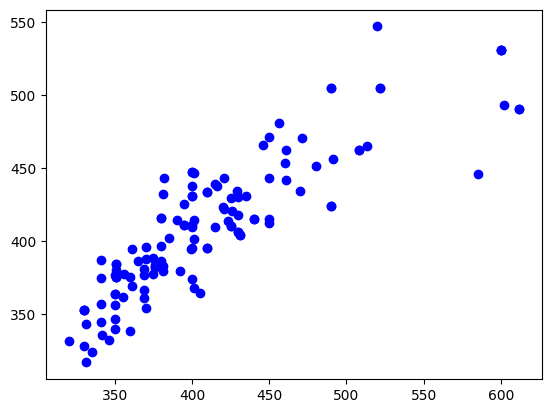

In [8]:
#Test our model
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred, color ='b')


In [9]:
#Analyse how our well our model did
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 24.47001459009675
MSE: 1161.561917403387
RMSE: 34.08169475544588
